In [1]:
from scipy import interpolate
from numpy import polynomial as P

In [2]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

In [4]:
p1 = P.Polynomial([1, 2, 3])
p1

Polynomial([1., 2., 3.], domain=[-1,  1], window=[-1,  1])

In [5]:
p2 = P.Polynomial.fromroots([-1, 1])
p2

Polynomial([-1.,  0.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

In [6]:
p1.roots()

array([-0.33333333-0.47140452j, -0.33333333+0.47140452j])

In [7]:
p2.roots()

array([-1.,  1.])

In [8]:
p1.coef

array([1., 2., 3.])

In [9]:
p1.domain

array([-1,  1])

In [10]:
p1.window

array([-1,  1])

In [11]:
p1(np.array([1.5, 2.5, 3.5]))

array([10.75, 24.75, 44.75])

In [12]:
p1 = P.Polynomial.fromroots([1, 2, 3])
p2 = P.Polynomial.fromroots([2])

In [13]:
p1//p2

Polynomial([ 3., -4.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

In [14]:
p3 = p1//p2
p3.roots()

array([1., 3.])

In [15]:
c1 = P.Chebyshev([1, 2, 3])
c1

Chebyshev([1., 2., 3.], domain=[-1,  1], window=[-1,  1])

In [16]:
c1.roots()

array([-0.76759188,  0.43425855])

In [17]:
c1 = P.Chebyshev.fromroots([-1, 1])
c1

Chebyshev([-0.5,  0. ,  0.5], domain=[-1.,  1.], window=[-1.,  1.])

In [19]:
l1 = P.Legendre.fromroots([-1, 1])
l1

Legendre([-0.66666667,  0.        ,  0.66666667], domain=[-1.,  1.], window=[-1.,  1.])

In [20]:
c1(np.array([0.5, 1.5, 2.5]))

array([-0.75,  1.25,  5.25])

In [21]:
l1(np.array([0.5, 1.5, 2.5]))

array([-0.75,  1.25,  5.25])

In [22]:
x = np.array([1, 2, 3, 4])
y = np.array([1, 3, 5, 4])

In [23]:
deg = len(x)-1
A = P.polynomial.polyvander(x, deg)
c = linalg.solve(A, y)
c

array([ 2. , -3.5,  3. , -0.5])

In [24]:
f1 = P.Polynomial(c)
f1(x)

array([1., 3., 5., 4.])

In [25]:
deg = len(x)-1
A = P.chebyshev.chebvander(x, deg)
c = linalg.solve(A, y)
c

array([ 3.5  , -3.875,  1.5  , -0.125])

In [26]:
f2 = P.Chebyshev(c)
f2(x)

array([1., 3., 5., 4.])

Text(0, 0.5, '$y$')

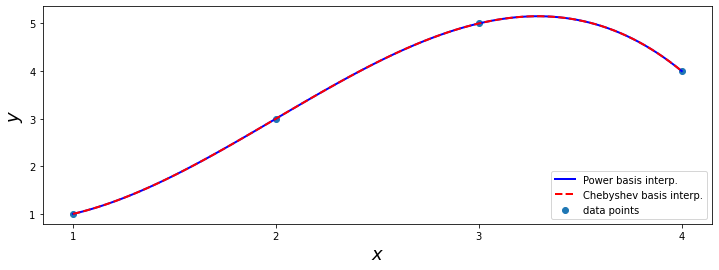

In [27]:
xx = np.linspace(x.min(), x.max(), 100)
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(xx, f1(xx), 'b', lw=2, label='Power basis interp.')
ax.plot(xx, f2(xx), 'r--', lw=2, label='Chebyshev basis interp.')
ax.scatter(x, y, label='data points')
ax.legend(loc=4)
ax.set_xticks(x)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)

In [28]:
f1b = P.Polynomial.fit(x, y, deg)
f1b

Polynomial([ 4.1875,  3.1875, -1.6875, -1.6875], domain=[1., 4.], window=[-1.,  1.])

In [29]:
f2b = P.Chebyshev.fit(x, y, deg)
f2b

Chebyshev([ 3.34375 ,  1.921875, -0.84375 , -0.421875], domain=[1., 4.], window=[-1.,  1.])

In [30]:
np.linalg.cond(P.chebyshev.chebvander(x, deg))

4659.738424139918

In [31]:
np.linalg.cond(P.chebyshev.chebvander((2*x-5)/3, deg))

1.8542033440472896

In [32]:
def runge(x):
    return 1/(1+25*(x**2))

In [33]:
def runge_interpolate(n):
    x = np.linspace(-1, 1, n+1)
    p = P.Polynomial.fit(x, runge(x), deg=n)
    return x, p

Text(0, 0.5, '$y$')

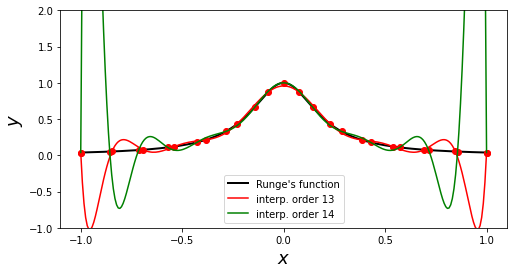

In [39]:
xx = np.linspace(-1, 1, 250)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(xx, runge(xx), 'k', lw=2, label='Runge\'s function')
n = 13
x, p = runge_interpolate(n)
ax.plot(x, runge(x), 'ro')
ax.plot(xx, p(xx), 'r', label='interp. order %d' % n)
n = 14
x, p = runge_interpolate(n)
ax.plot(x, runge(x), 'ro')
ax.plot(xx, p(xx), 'g', label='interp. order %d' % n)
ax.legend(loc=8)
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1, 2)
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)

In [35]:
x = np.linspace(-1, 1, 11)
y = runge(x)
f_i = interpolate.interp1d(x, y, kind=3)
f_i

Text(0, 0.5, '$y$')

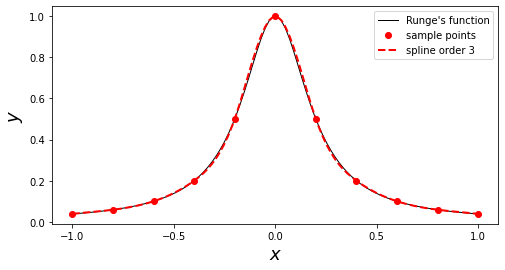

In [36]:
xx = np.linspace(-1, 1, 100)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(xx, runge(xx), 'k', lw=1, label='Runge\'s function')
ax.plot(x, y, 'ro', label='sample points')
ax.plot(xx, f_i(xx), 'r--', lw=2, label='spline order 3')
ax.legend()
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)

Text(0, 0.5, '$y$')

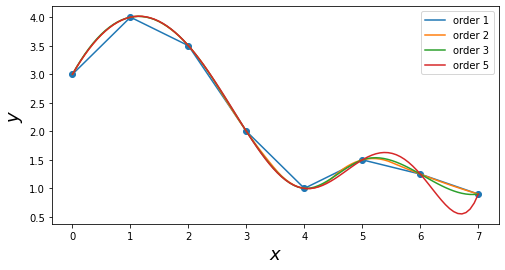

In [38]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7])
y = np.array([3, 4, 3.5, 2, 1, 1.5, 1.25, 0.9])
xx = np.linspace(x.min(), x.max(), 100)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.scatter(x, y)
for n in [1, 2, 3, 5]:
    f = interpolate.interp1d(x, y, kind=n)
    ax.plot(xx, f(xx), label='order %d' % n)
ax.legend()
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)

In [40]:
x = y = np.linspace(-2, 2, 10)
def f(x, y):
    return np.exp(-(x+.5)**2-2*(y+.5)**2)-np.exp(-(x-.5)**2-2*(y-.5)**2)

In [41]:
X, Y = np.meshgrid(x, y)
Z = f(X, Y)+0.05*np.random.randn(*X.shape)

In [42]:
Z

array([[ 0.01539748,  0.05392512, -0.09613706,  0.01274243,  0.0367445 ,
        -0.02803663, -0.0440538 , -0.01898772, -0.04213004,  0.00236577],
       [-0.01138247,  0.05249688,  0.06434636,  0.06334835,  0.10142468,
         0.03141005,  0.01260407, -0.03201079,  0.06429936, -0.06427797],
       [ 0.0983636 ,  0.11701361,  0.32697173,  0.46562414,  0.49105182,
         0.29651095,  0.13786315,  0.05781443, -0.00383156, -0.01950423],
       [ 0.07635087,  0.42768399,  0.66838537,  0.89120267,  0.79775967,
         0.45301465,  0.22716799, -0.05097731, -0.06304766, -0.0571407 ],
       [ 0.11002512,  0.3218336 ,  0.56227533,  0.71468919,  0.58701636,
         0.15661409, -0.13688191, -0.15877267, -0.12569828, -0.06197729],
       [ 0.07802501,  0.04510398,  0.19334704,  0.12246135, -0.16797318,
        -0.50374081, -0.77827739, -0.59024836, -0.22101063, -0.13887139],
       [ 0.04178517, -0.02775748, -0.0553851 , -0.2238186 , -0.49721242,
        -0.89466777, -0.93712221, -0.66803181

In [43]:
f_i = interpolate.interp2d(x, y, Z, kind='cubic')

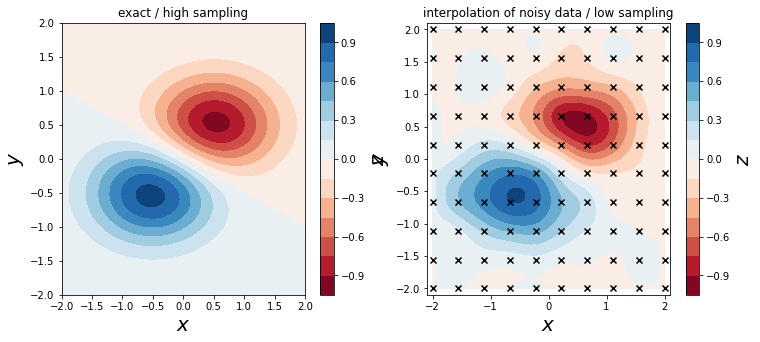

In [45]:
xx = yy = np.linspace(x.min(), x.max(), 100)
ZZi = f_i(xx, yy)
XX, YY = np.meshgrid(xx, yy)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# for reference, first plot the contours of the exact function
c = axes[0].contourf(XX, YY, f(XX, YY), 15, cmap=plt.cm.RdBu)
axes[0].set_xlabel(r"$x$", fontsize=20)
axes[0].set_ylabel(r"$y$", fontsize=20)
axes[0].set_title("exact / high sampling")
cb = fig.colorbar(c, ax=axes[0])
cb.set_label(r"$z$", fontsize=20)
# next, plot the contours of the supersampled interpolation of the noisy data
c = axes[1].contourf(XX, YY, ZZi, 15, cmap=plt.cm.RdBu)
axes[1].set_ylim(-2.1, 2.1)
axes[1].set_xlim(-2.1, 2.1)
axes[1].set_xlabel(r"$x$", fontsize=20)
axes[1].set_ylabel(r"$y$", fontsize=20)
axes[1].scatter(X, Y, marker='x', color='k')
axes[1].set_title("interpolation of noisy data / low sampling")
cb = fig.colorbar(c, ax=axes[1])
cb.set_label(r"$z$", fontsize=20)

In [46]:
def f(x, y):
    return np.exp(-x**2 - y**2) * np.cos(4*x) * np.sin(6*y)
N = 500
xdata = np.random.uniform(-1, 1, N)
ydata = np.random.uniform(-1, 1, N)
zdata = f(xdata, ydata)

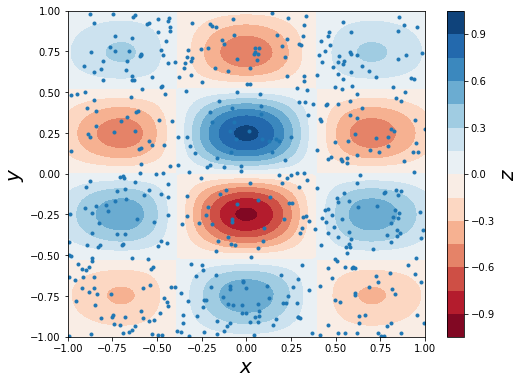

In [47]:
x = y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig, ax = plt.subplots(figsize=(8, 6))
c = ax.contourf(X, Y, Z, 15, cmap=plt.cm.RdBu);
ax.scatter(xdata, ydata, marker='.')
ax.set_ylim(-1,1)
ax.set_xlim(-1,1)
ax.set_xlabel(r"$x$", fontsize=20)
ax.set_ylabel(r"$y$", fontsize=20)
cb = fig.colorbar(c, ax=ax)
cb.set_label(r"$z$", fontsize=20)

In [48]:
def z_interpolate(xdata, ydata, zdata):
    Zi_0 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='nearest')
    Zi_1 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='linear')
    Zi_3 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='cubic')
    return Zi_0, Zi_1, Zi_3

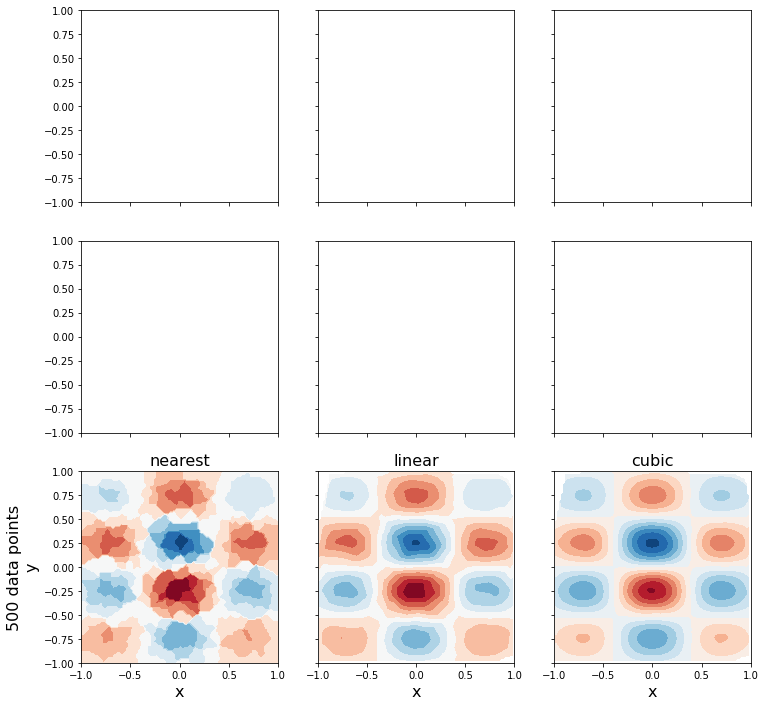

In [49]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12), sharex=True, sharey=True)
n_vec = [50, 150, 500]
for idx, n in enumerate(n_vec):
    Zi_0, Zi_1, Zi_3 = z_interpolate(xdata[:n], ydata[:n], zdata[:n])
axes[idx, 0].contourf(X, Y, Zi_0, 15, cmap=plt.cm.RdBu)
axes[idx, 0].set_ylabel("%d data points\ny" % n, fontsize=16)
axes[idx, 0].set_title("nearest", fontsize=16)
axes[idx, 1].contourf(X, Y, Zi_1, 15, cmap=plt.cm.RdBu)
axes[idx, 1].set_title("linear", fontsize=16)
axes[idx, 2].contourf(X, Y, Zi_3, 15, cmap=plt.cm.RdBu)
axes[idx, 2].set_title("cubic", fontsize=16)
for m in range(len(n_vec)):
    axes[idx, m].set_xlabel("x", fontsize=16)